# Bank Loan Approval Prediction using Artificial Neaural Network

In this project, we will build and train a deep neaural network model to predict the likelyhood of a liability customer buying personal loans based on customer features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

In [2]:
bank_df = pd.read_csv("UniversalBank.csv")

In [3]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_df.shape

(5000, 14)

- ID: Customer ID
- Age: Customer Age
- Experience: Amount of work experience in years
- Income: Amount of annual income (in thousands)
- Zipcode: Zipcode of where customer lives
- Family: Number of family members
- CCAvg: Average monthly credit card spendings
- Education: Education level (1: Bachelor, 2: Master, 3: Advanced Degree)
- Mortgage: Mortgage of house (in thousands)
- Securities Account: Boolean of whether customer has a securities account
- CD Account: Boolean of whether customer has Certificate of Deposit account
- Online: Boolean of whether customer uses online banking
- CreditCard: Does the customer use credit card issued by the bank?
- Personal Loan: This is the target variable (Binary Classification Problem)

## Exploratory Data Analysis

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Great, we have no missing values!

In [8]:
avg_age = bank_df["Age"].mean()
print ("The average age of this dataset is {:.1f}.".format(avg_age))

The average age of this dataset is 45.3.


In [9]:
percent_cc = sum(bank_df["CreditCard"] == 1)/len(bank_df)
print ("The percentage of customers that own the bank's credit card is {:.2%}.".format(percent_cc))

The percentage of customers that own the bank's credit card is 29.40%.


In [10]:
percent_loan = sum(bank_df["Personal Loan"] == 1)/len(bank_df)
print ("The percentage of customers that took out a personal loan is {:.2%}.".format(percent_loan))

The percentage of customers that took out a personal loan is 9.60%.


## Data Visualization

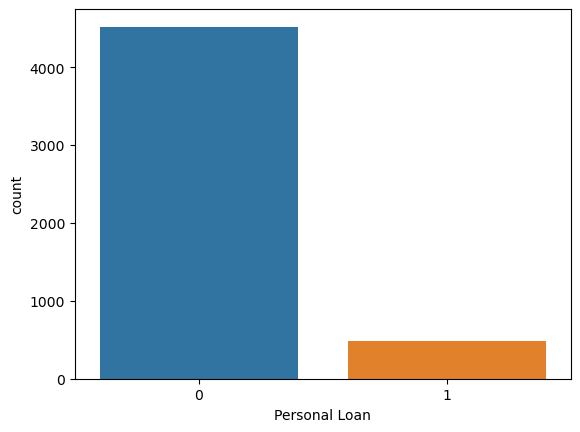

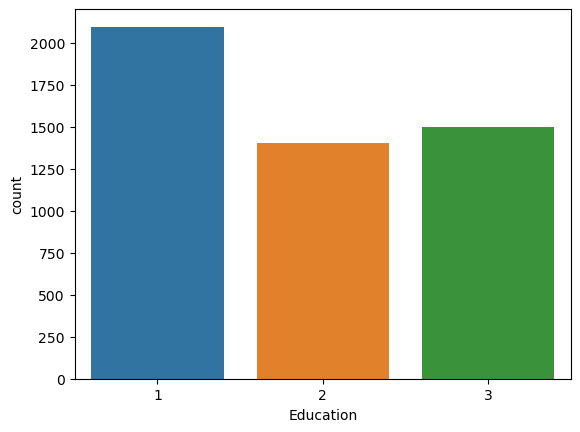

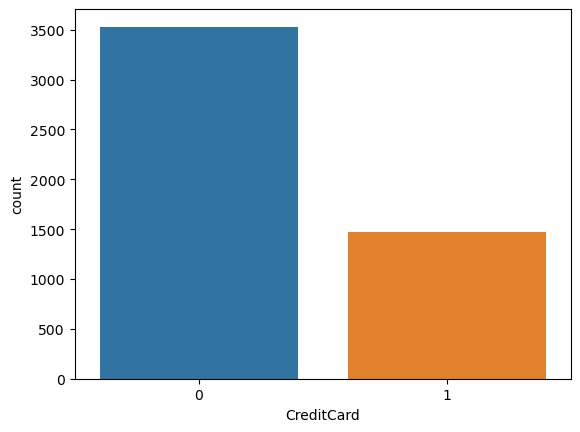

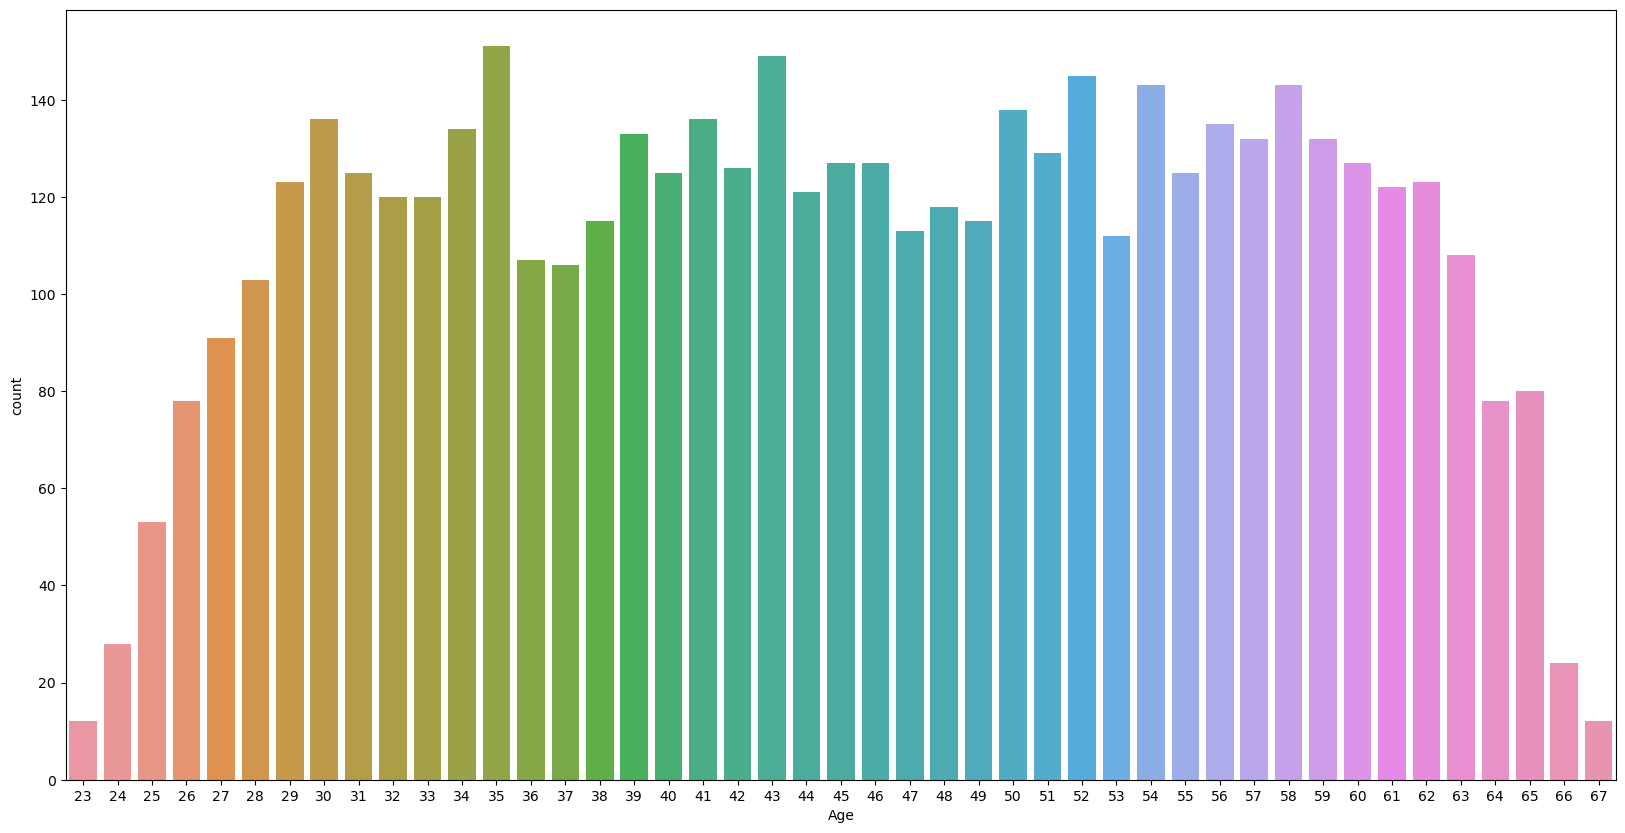

In [11]:
sns.countplot(x=bank_df["Personal Loan"])
plt.show()

sns.countplot(x=bank_df["Education"])
plt.show()

sns.countplot(x=bank_df["CreditCard"])
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x=bank_df["Age"])
plt.savefig('age.png', facecolor='w', bbox_inches='tight')
plt.show()

C:\Users\simon\AppData\Local\Temp\ipykernel_12424\1525225000.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_df["Income"])


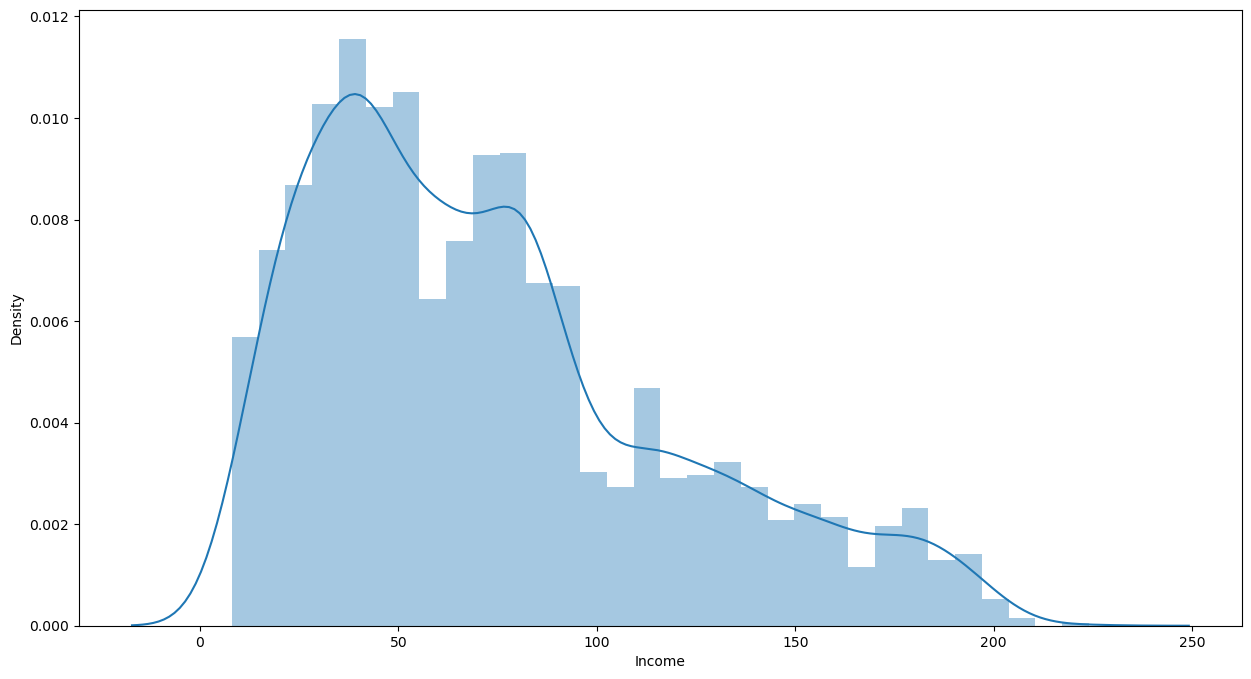

In [12]:
# lets look at the distribution of the income
plt.figure(figsize=(15,8))
sns.distplot(bank_df["Income"])
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

In [13]:
# lets create 2 dataframes: one with personal loans and one without personal loans
personal_loans = bank_df[bank_df['Personal Loan'] == 1].copy()
no_personal_loans = bank_df[bank_df['Personal Loan'] == 0].copy()

In [14]:
personal_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [15]:
no_personal_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


C:\Users\simon\AppData\Local\Temp\ipykernel_12424\1055937174.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personal_loans["Income"], label='Approved')
C:\Users\simon\AppData\Local\Temp\ipykernel_12424\1055937174.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_personal_loans["Income"

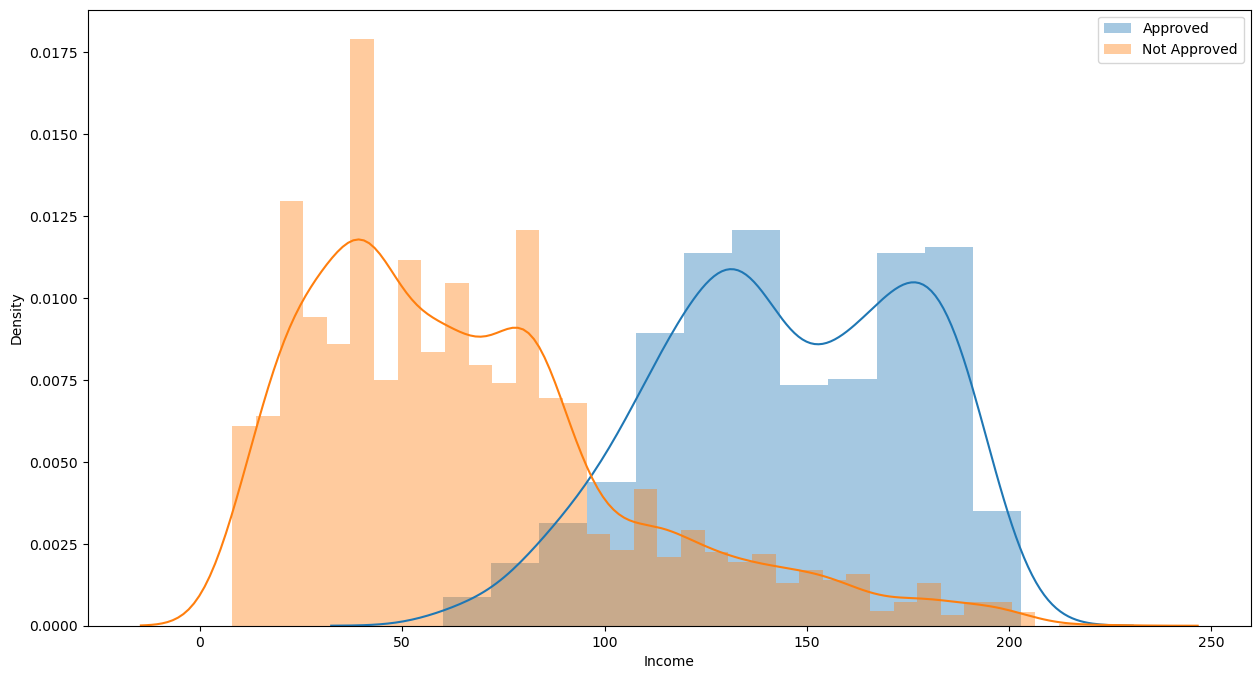

In [16]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["Income"], label='Approved')
sns.distplot(no_personal_loans["Income"], label='Not Approved')
plt.legend()
plt.savefig('approved_not_approved.png', facecolor='w', bbox_inches='tight')
plt.show()

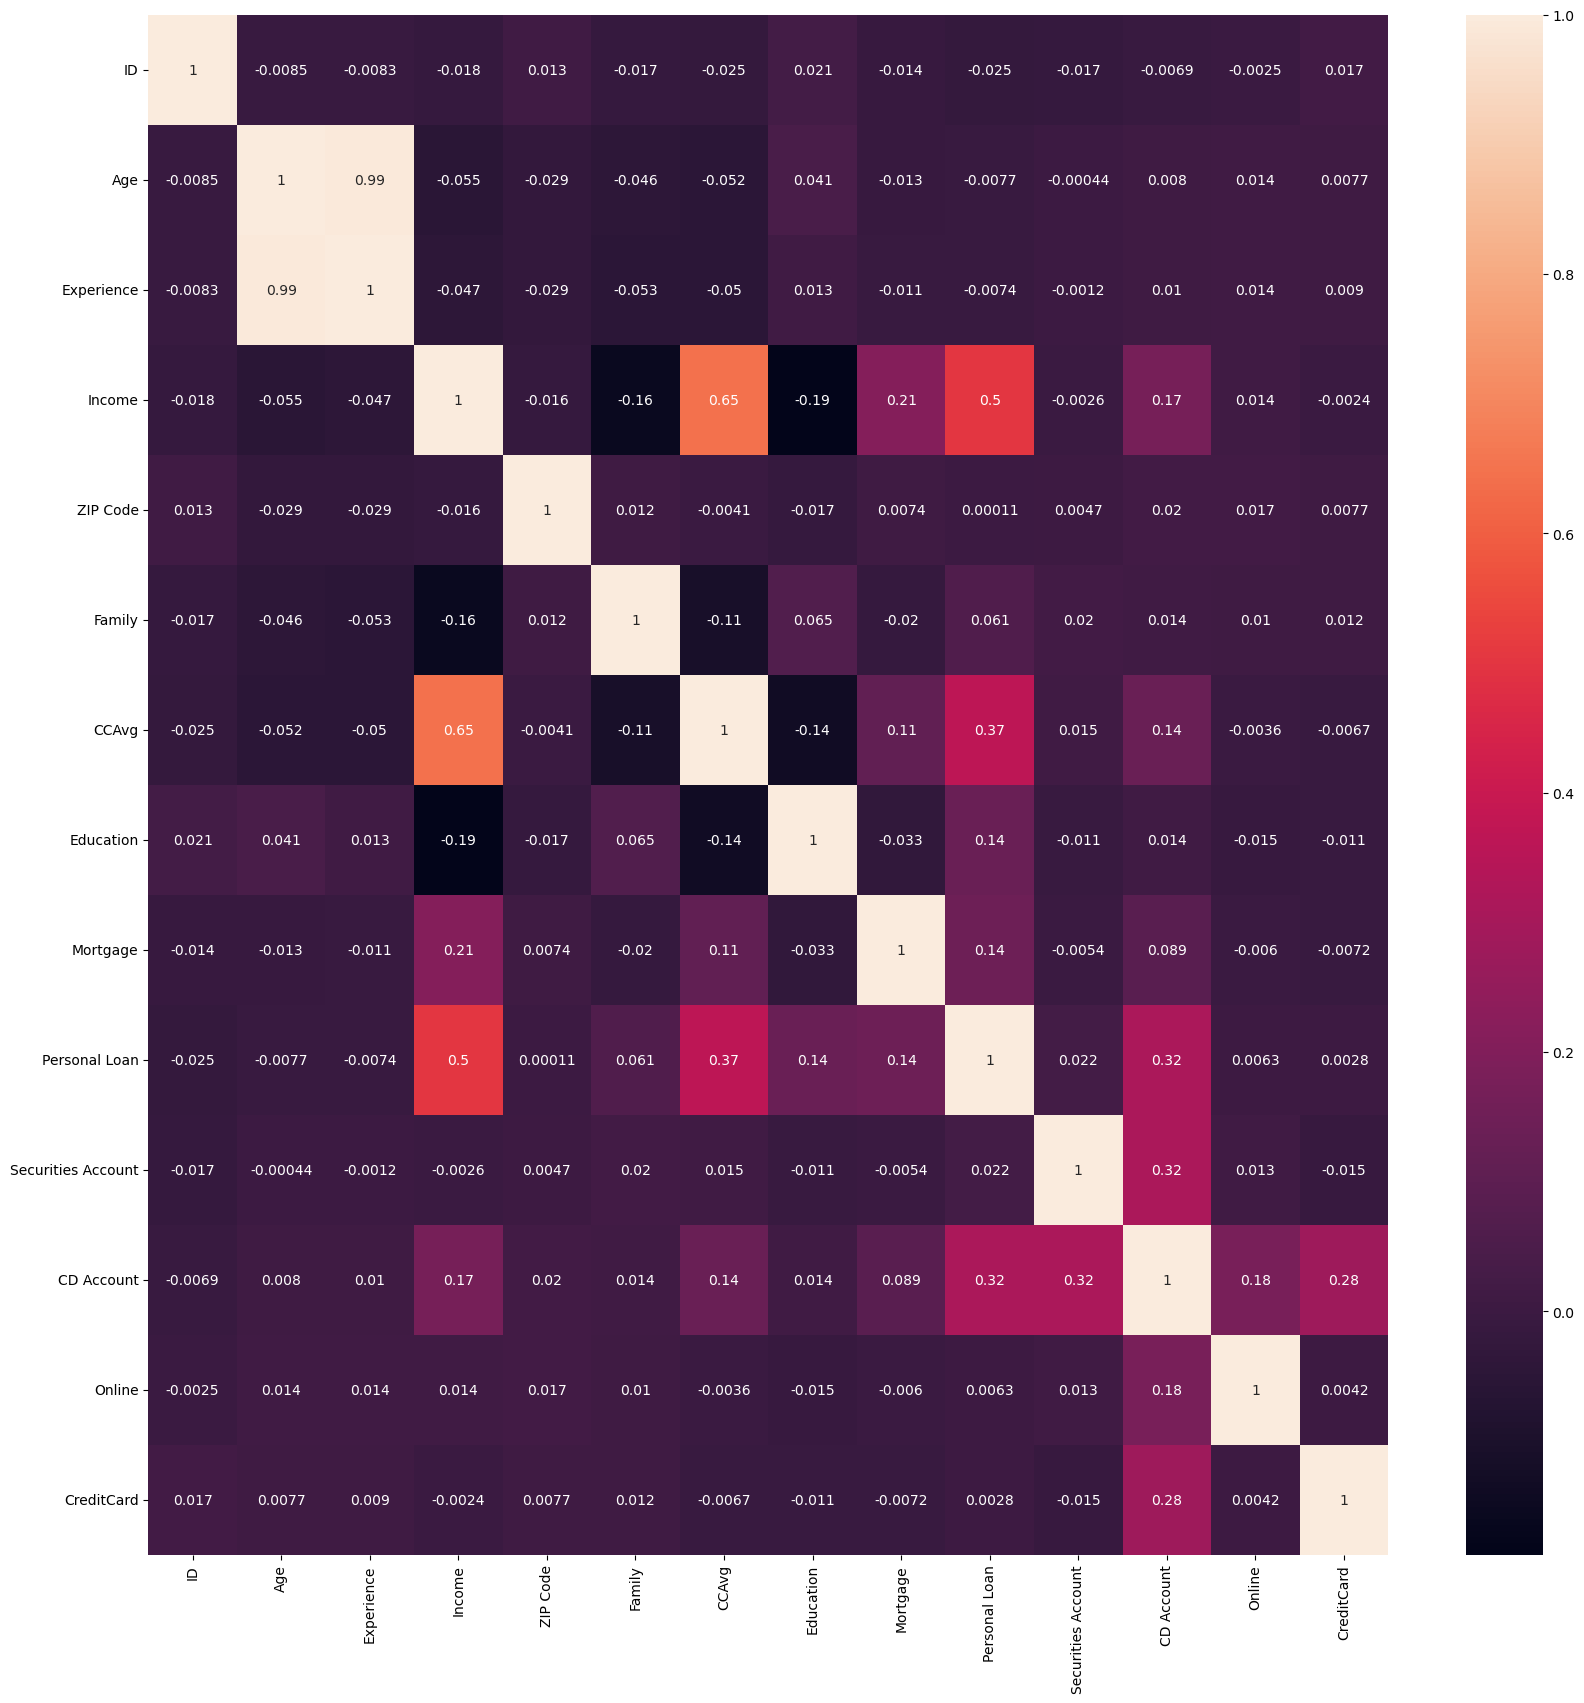

In [17]:
cm = bank_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.savefig('heatmap.png', facecolor='w', bbox_inches='tight')
plt.show()

C:\Users\simon\AppData\Local\Temp\ipykernel_12424\3544573517.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_df["CCAvg"])


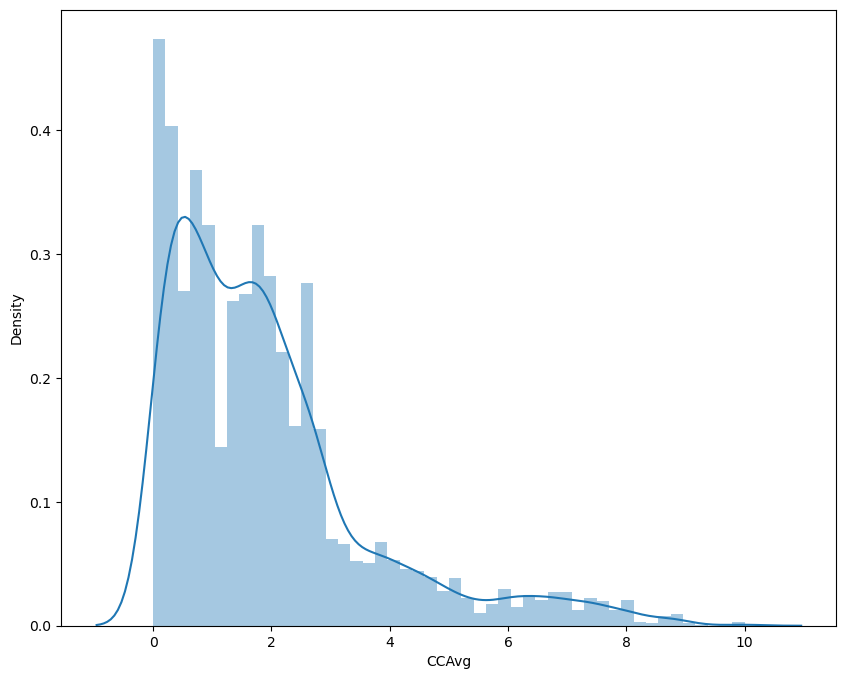

In [18]:
# lets look at the distribution of average credit card spending
plt.figure(figsize=(10,8))
sns.distplot(bank_df["CCAvg"])
plt.show()

C:\Users\simon\AppData\Local\Temp\ipykernel_12424\133422488.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personal_loans["CCAvg"])
C:\Users\simon\AppData\Local\Temp\ipykernel_12424\133422488.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_personal_loans["CCAvg"])


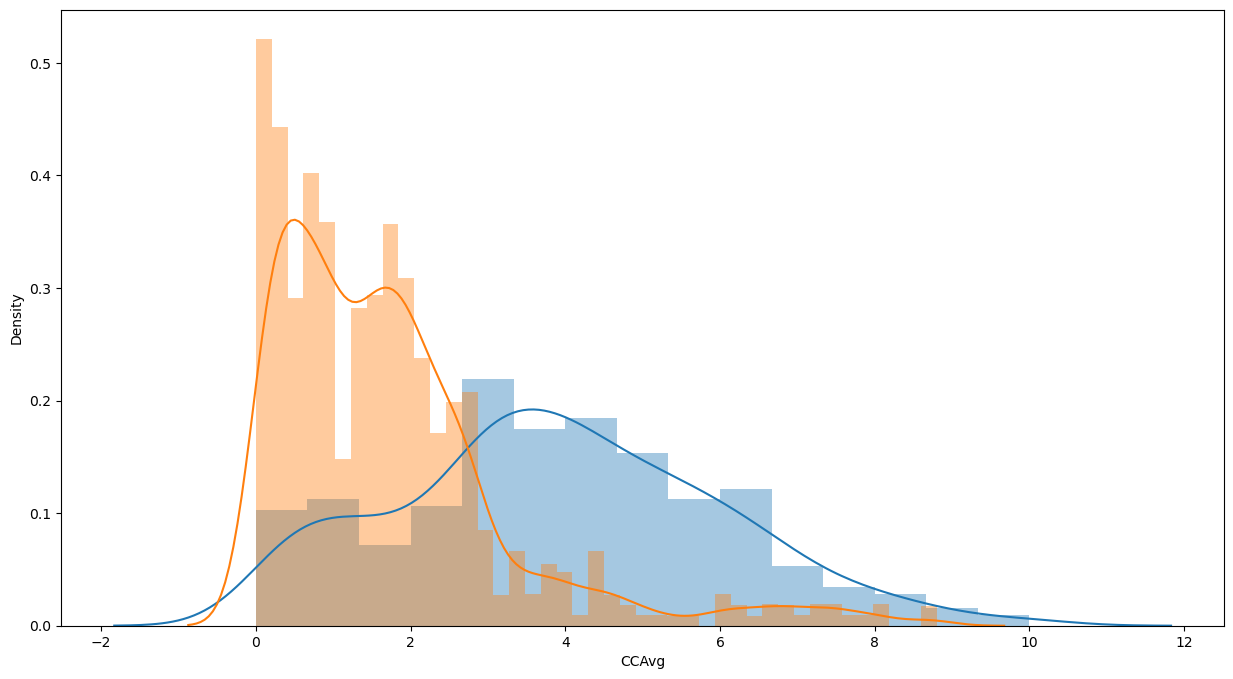

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["CCAvg"])
sns.distplot(no_personal_loans["CCAvg"])
plt.show()

C:\Users\simon\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\simon\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\simon\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\simon\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\simon\anaconda3\envs\dev\lib\site-packages\seaborn\categori

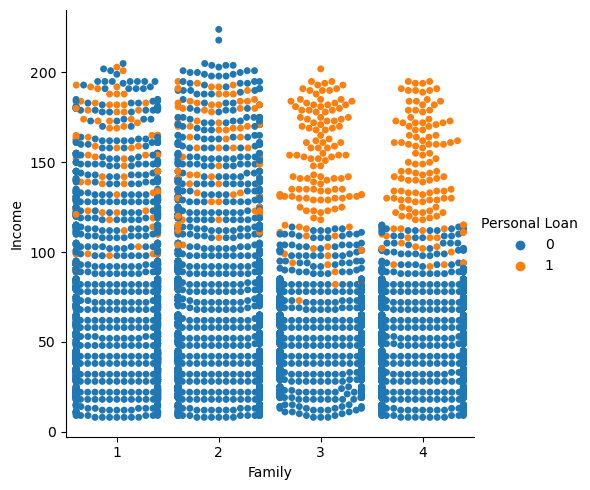

In [20]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = bank_df, kind='swarm')

 # Observation: Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

<Axes: xlabel='Education', ylabel='Income'>

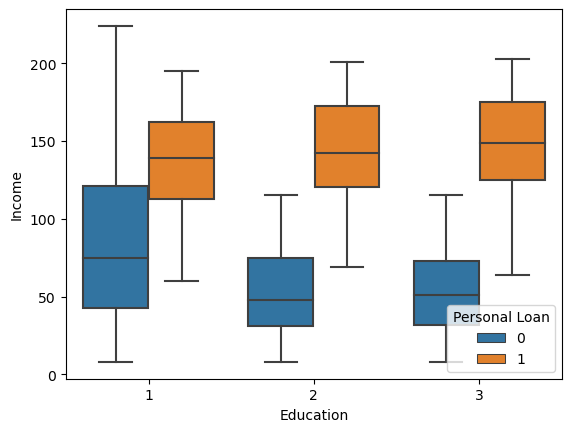

In [40]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = bank_df)

## Observation: From above we can say that customers with undergraduate level of education and family greater than 3 are good customers who took loan. Customer who took loan have same income range irrespective of education level. Education of Graduate and above have more chance to take loan.

<Axes: xlabel='Education', ylabel='Mortgage'>

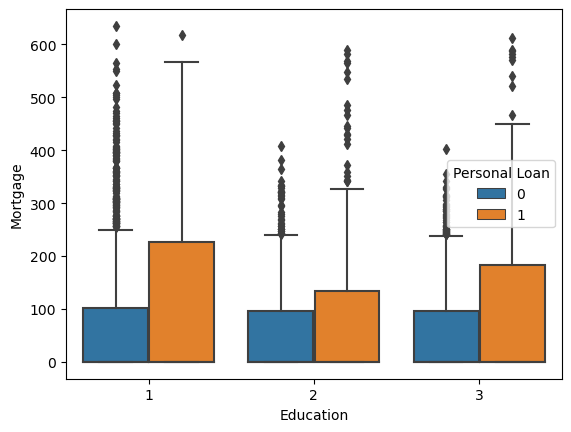

In [41]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank_df)

## Observation : From the above box plot we can see that customers whose education level is 1 and did not take loan has higher mortgage than customers who take loan of same education level. Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level.

<Axes: xlabel='Securities Account', ylabel='count'>

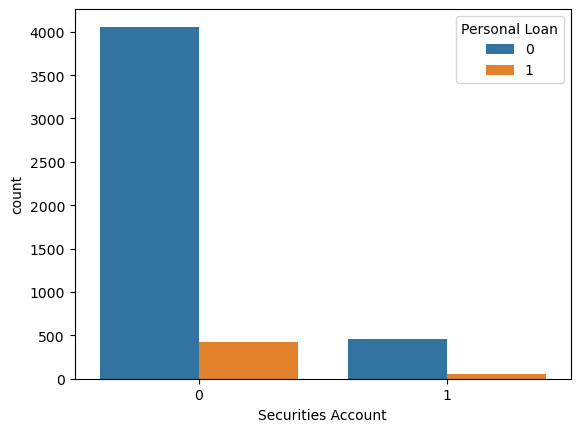

In [42]:
sns.countplot(x="Securities Account", data=bank_df,hue="Personal Loan")

## Observation : Customers who has securies account are more likly to take loan. Majority of customers who does not have loan do not have securities account.

<Axes: xlabel='Family', ylabel='count'>

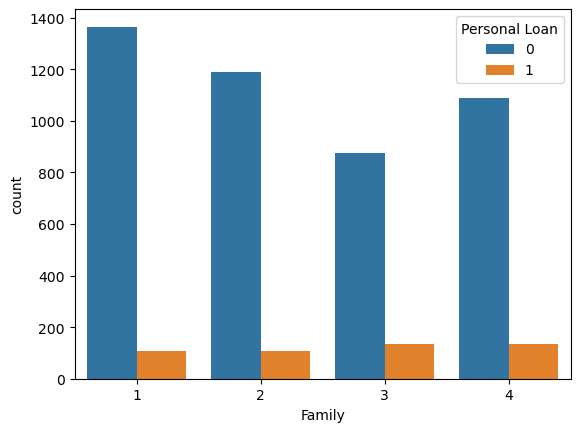

In [43]:
sns.countplot(x='Family',data=bank_df,hue='Personal Loan')

## Observation : Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

<Axes: xlabel='CD Account', ylabel='count'>

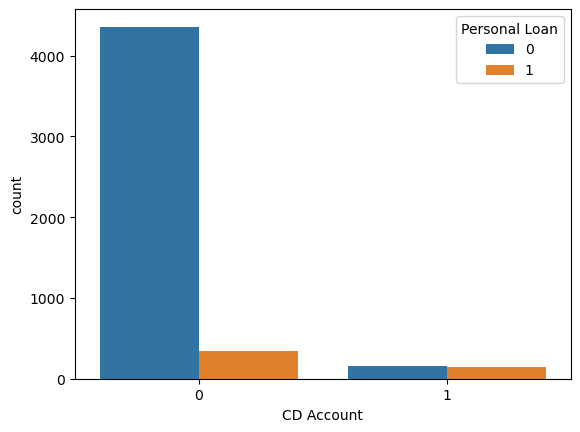

In [44]:
sns.countplot(x='CD Account',data=bank_df,hue='Personal Loan')

## Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

<Axes: xlabel='CreditCard', ylabel='CCAvg'>

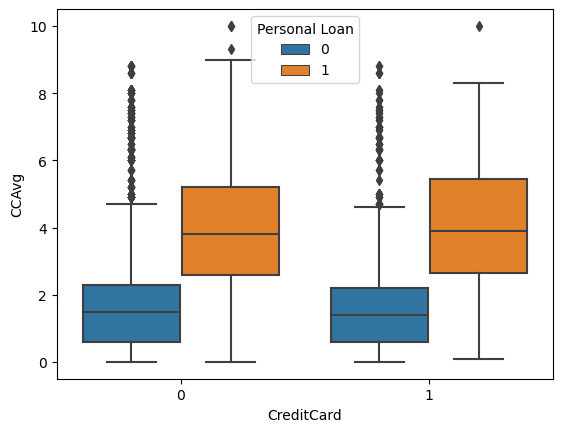

In [45]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=bank_df)

## Observation: Customers who have credit card and monthly spending is higher are more likly to take loan.

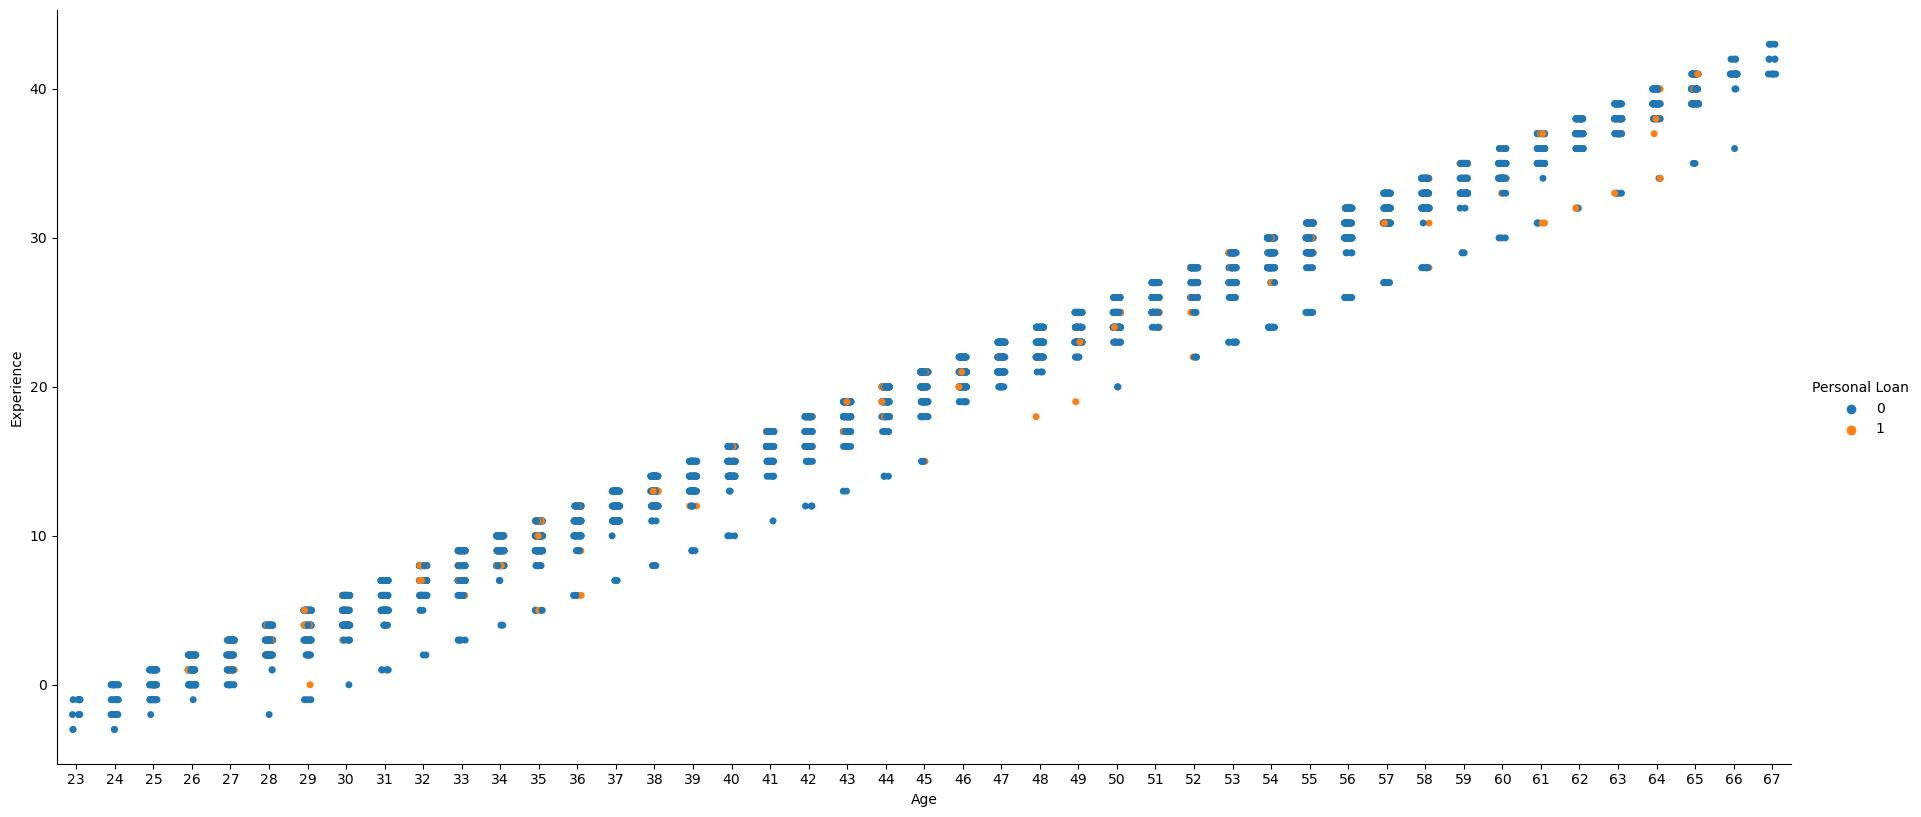

In [46]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = bank_df, height=8.27, aspect=11/5)

## Observation: From the above we clearly see that Age and Experience have very storng association. As Age increases Experience also increases. We can try building our model by droping Experience column.

## Data Preparation

In [25]:
from tensorflow.keras.utils import to_categorical

X = bank_df.drop(columns=["Personal Loan"])
y = bank_df["Personal Loan"]

y = to_categorical(y)

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 13), (1000, 13), (4000, 2), (1000, 2))

## Building a multi-layer neaural network model

In [28]:
# sequential model
ann_model = keras.Sequential()

# adding dense layer
ann_model.add(Dense(250, input_dim=13, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with softmax activation/output layer
ann_model.add(Dense(2, activation='softmax'))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

## Compilation and training of deep learning model

In [29]:
# custom functions for f1, precision and recall

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [30]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']

In [31]:
history = ann_model.fit(X_train, y_train, epochs=25, validation_split=0.2, verbose=1)

Epoch 1/25
100/100 [==============================] - 2s 10ms/step - loss: 0.2098 - f1_m: 0.9316 - val_loss: 0.1200 - val_f1_m: 0.9500
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 0.0979 - f1_m: 0.9684 - val_loss: 0.0905 - val_f1_m: 0.9650
Epoch 3/25
100/100 [==============================] - 1s 8ms/step - loss: 0.0925 - f1_m: 0.9694 - val_loss: 0.0952 - val_f1_m: 0.9663
Epoch 4/25
100/100 [==============================] - 1s 8ms/step - loss: 0.0805 - f1_m: 0.9722 - val_loss: 0.0846 - val_f1_m: 0.9688
Epoch 5/25
100/100 [==============================] - 1s 8ms/step - loss: 0.0685 - f1_m: 0.9781 - val_loss: 0.0767 - val_f1_m: 0.9750
Epoch 6/25
100/100 [==============================] - 1s 9ms/step - loss: 0.0601 - f1_m: 0.9800 - val_loss: 0.0635 - val_f1_m: 0.9750
Epoch 7/25
100/100 [==============================] - 1s 7ms/step - loss: 0.0605 - f1_m: 0.9797 - val_loss: 0.0706 - val_f1_m: 0.9650
Epoch 8/25
100/100 [==============================] - 1s 8ms/

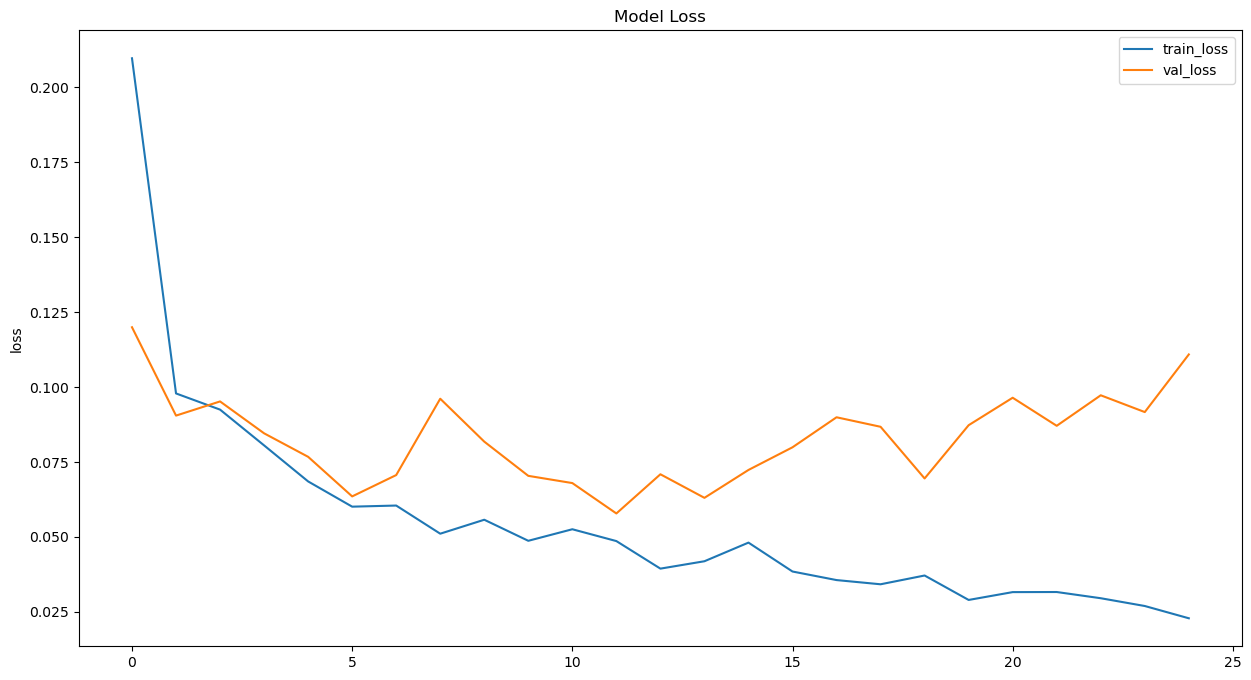

In [32]:
# Plot the model performance across epochs
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
plt.show()

## Evaluating model performance

In [33]:
predictions = ann_model.predict(X_test)
predict = []

for i in predictions:
    predict.append(np.argmax(i))

32/32 [==============================] - 0s 3ms/step


In [34]:
from sklearn import metrics
y_test = np.argmax(y_test, axis=1)

f1_test = metrics.f1_score(y_test, predict)
prec = metrics.precision_score(y_test, predict)
rec = metrics.recall_score(y_test, predict)
acc = metrics.accuracy_score(y_test, predict)

print ("F1 Score: {:.4f}.".format(f1_test))
print ("Precision: {:.4f}.".format(prec))
print ("Recall: {:.4f}.".format(rec))
print ("Accuracy: {:.4f}.".format(acc)) # note this is not a good measure of performance for this project as dataset is unbalanced.

F1 Score: 0.8966.
Precision: 0.9512.
Recall: 0.8478.
Accuracy: 0.9820.


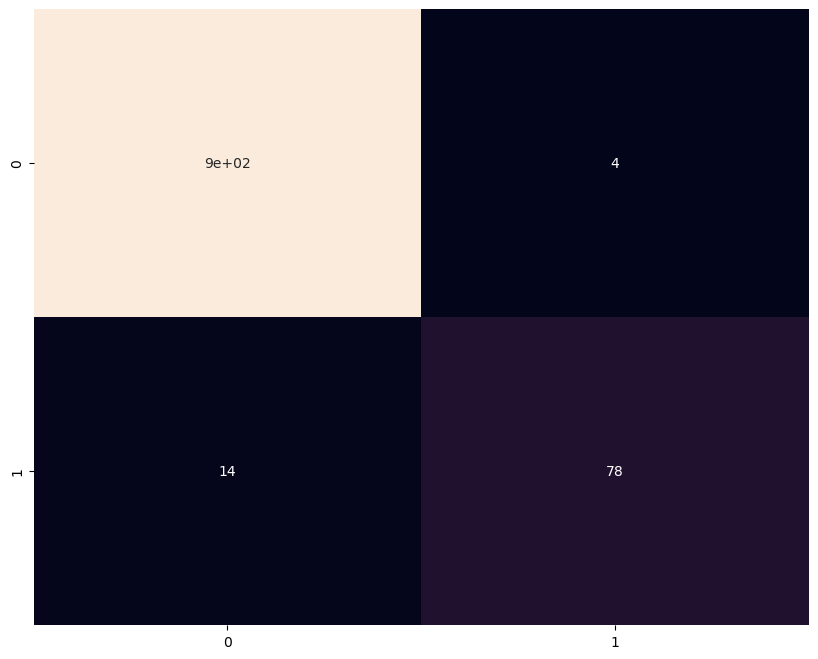

In [35]:
conf_mat = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

In [36]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.95      0.85      0.90        92

    accuracy                           0.98      1000
   macro avg       0.97      0.92      0.94      1000
weighted avg       0.98      0.98      0.98      1000

